In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.1 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
# Download NLTK stop words
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install -q transformers==4.37.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 59.0 MB/s eta 0:00:00


In [ ]:
!pip install pydot

In [ ]:
from transformers import AutoTokenizer, TFAutoModel, TFAutoModelForMaskedLM

In [ ]:
dataset = load_dataset("orieg/elsevier-oa-cc-by")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for orieg/elsevier-oa-cc-by contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/orieg/elsevier-oa-cc-by
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datas

Generating train split:   0%|          | 0/32072 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4008 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4009 [00:00<?, ? examples/s]

In [ ]:
elsevier_dataset = dataset

In [ ]:
print(elsevier_dataset)

DatasetDict({
    train: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 32072
    })
    test: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 4008
    })
    validation: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 4009
    })
})


In [ ]:
train_set = elsevier_dataset['train']
train_df = pd.DataFrame(train_set)
print("Shape of the training set:", train_df.shape)


Shape of the training set: (32072, 7)


In [ ]:
val_set = elsevier_dataset['validation']
val_df = pd.DataFrame(val_set)

test_set = elsevier_dataset['test']
test_df = pd.DataFrame(test_set)

In [ ]:
print(val_df.shape)
print(test_df.shape)

(4009, 7)
(4008, 7)


In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32072 entries, 0 to 32071
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              32072 non-null  object
 1   abstract           32072 non-null  object
 2   subjareas          32072 non-null  object
 3   keywords           32072 non-null  object
 4   asjc               32072 non-null  object
 5   body_text          32072 non-null  object
 6   author_highlights  32072 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB
None


In [ ]:
train_df.head()

,title,abstract,subjareas,keywords,asjc,body_text,author_highlights
0,Performance bonuses in the public sector: Winn...,We conduct a randomized trial to compare incen...,"[ECON, SOCI]","[Child development, Contest design, Malnutriti...","[2002, 3303]",[Prize contests and other performance incentiv...,"[Bonuses can be paid in proportion to success,..."
1,Energy and water use of a small-scale raft aqu...,Aquaponics is a form of aquaculture that integ...,[AGRI],"[Aquaculture, Aquaponic raft culture, Aquaponi...",[1104],[Aquaponics is a form of aquaculture that inte...,[Inputs and outputs of a small-scale raft aqua...
2,Beyond a bigger brain: Multivariable structura...,People with larger brains tend to score higher...,"[ARTS, PSYC]","[Brain, G-factor, Intelligence, MRI, Structura...","[1201, 3204, 3205]",[Half or more of the variance in human intelli...,[Brain size is known to correlate with general...
3,Experimental data on compressive strength and ...,In this data article experimental data on the ...,[MULT],"[Acid resistance, Bitumen, Compressive strengt...",[1000],[The data include information on the propertie...,[]
4,Visual short-term memory binding deficit in fa...,Long-term episodic memory deficits in Alzheime...,"[NEUR, PSYC]","[Hippocampus, Medial temporal lobe, Relational...","[2805, 3205, 3206]","[Memory impairment is a central, defining feat...",[]


In [ ]:
def adjust_subjareas(subjareas_list):
    if any(area in subjareas_list for area in ['VETE', 'HEAL', 'DENT', 'NURS']):
        return ['MEDI']
    elif any(area in subjareas_list for area in ['ECON', 'ARTS', 'BUSI', 'DECI']):
        return ['SOCI']
    elif 'MATH' in subjareas_list:
        return ['MULT']
    else:
        return subjareas_list

train_df['subjareas'] = train_df['subjareas'].apply(adjust_subjareas)
val_df['subjareas'] = val_df['subjareas'].apply(adjust_subjareas)
test_df['subjareas'] = test_df['subjareas'].apply(adjust_subjareas)

In [ ]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(32072, 7)
(4009, 7)
(4008, 7)


Step 2: Data Pre-processing

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

def trim_text(text, word_limit):
    """
    Trims text to a specific word limit.

    Args:
    - text (str or list): Text to be trimmed.
    - word_limit (int): The initial word limit to apply.

    Returns:
    - str: Text trimmed to the specified word limit.
    """
    if isinstance(text, list):
        text = ' '.join(text)
    elif text is None:
        return ""

    words = text.split()[:word_limit]
    return ' '.join(words)

def add_additional_body_text(body_text, start_index, word_limit):
    """
    Extracts additional words from the body text starting from a specific index.

    Args:
    - body_text (str or list): The body text from which to extract additional words.
    - start_index (int): The index to start extracting additional words.
    - word_limit (int): The number of additional words to extract.

    Returns:
    - str: The additional text extracted from the body text.
    """
    if isinstance(body_text, list):
        body_text = ' '.join(body_text)

    words = body_text.split()[start_index:start_index+word_limit]
    return ' '.join(words)


def prepare_elsevier_data(train_df, val_df, test_df, abstract_column_name='abstract', body_text_column_name='body_text', title_column_name= 'title', label_column_name='subjareas'):
    """
    Prepares the Elsevier corpus splits for processing with two stages:
    1. First 200 words of the abstract and first 300 words of the body text.
    2. Next 500 words of the body text.
    """
    mlb = MultiLabelBinarizer()
    all_labels = pd.concat([train_df[label_column_name], val_df[label_column_name], test_df[label_column_name]])
    mlb.fit(all_labels)

    train_labels = mlb.transform(train_df[label_column_name])
    val_labels = mlb.transform(val_df[label_column_name])
    test_labels = mlb.transform(test_df[label_column_name])

    def process_texts(df):
        concatenated_texts = []
        for abstract, body, title in zip(df[abstract_column_name], df[body_text_column_name], df[title_column_name]):
            initial_sequence = f"{trim_text(abstract, 200)} [SEP] {trim_text(body, 250)} [SEP] {trim_text(title, 50)}"

            text_segments = [initial_sequence]

            additional_body_text = add_additional_body_text(body, 300, 500)
            if additional_body_text:
                text_segments.append(additional_body_text)

            second_additional_body_text = add_additional_body_text(body, 800, 500)
            if second_additional_body_text:
                text_segments.append(second_additional_body_text)

            concatenated_texts.append(text_segments)
        return concatenated_texts

    concatenated_train_texts = process_texts(train_df)
    concatenated_val_texts = process_texts(val_df)
    concatenated_test_texts = process_texts(test_df)

    return (concatenated_train_texts, train_labels,
            concatenated_val_texts, val_labels,
            concatenated_test_texts, test_labels,
            mlb.classes_)


concatenated_train_texts, train_labels, concatenated_val_texts, val_labels, concatenated_test_texts, test_labels, target_names = prepare_elsevier_data(train_df, val_df, test_df)


In [ ]:
print(train_labels[:2])
print(concatenated_train_texts[:2])
print(len(target_names))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[["We conduct a randomized trial to compare incentives for improved child outcomes among salaried caregivers in Chandigarh, India. A contest whose prize is divided among workers in proportion to measured gains yielded more improvement than a winner-take-all program. In our population of about 2000 children served by 85 workers, using proportional rewards led to weight-for-age malnutrition rates that were 4.3 percentage points lower at 3 months (when rewards were paid) and 5.9 points lower at 6 months (after the contest had ended), with mean weight-for-age z scores that were 0.071 higher at 3 months, and 0.095 higher at 6 months. Proportional bonuses led to larger and more sustained gains because of better performance by lower-ranked workers, whose efforts were not rewarded by a winner-take-all prize. Results are consistent with previous laboratory trials and athletic events, demonstrating the value of propor

In [ ]:
print(len(concatenated_train_texts))
print(len(concatenated_val_texts))

32072
4009


In [ ]:
# Convert validation labels to a NumPy array
npvalid_labels = np.asarray(val_labels)
nptrain_labels = np.asarray(train_labels)
nptest_labels = np.asarray(test_labels)


step 3: Classification with fine tuned BERT Model

In [ ]:
model_checkpoint = 'allenai/scibert_scivocab_cased'

scibert_tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

scibert_model = TFAutoModel.from_pretrained(model_checkpoint, from_pt=True)

scibert_mlm = TFAutoModelForMaskedLM.from_pretrained(model_checkpoint, from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint

In [ ]:
def tokenize_texts(text_segments_list, tokenizer, max_length=512):
    """
    Tokenizes a list of text segments using the provided tokenizer.

    Args:
        text_segments_list (list of list of str): Each inner list contains one or more text segments for a document.
        tokenizer: The tokenizer to use.
        max_length (int): The maximum token length for each segment.

    Returns:
        A list of tokenized and encoded text segments suitable for model input.
    """
    tokenized_outputs = []

    for text_segments in text_segments_list:
        document_encodings = [tokenizer(text, truncation=True, padding='max_length', max_length=max_length, return_tensors='tf') for text in text_segments]
        tokenized_outputs.append(document_encodings)

    return tokenized_outputs

train_encodings = tokenize_texts(concatenated_train_texts, scibert_tokenizer)
valid_encodings = tokenize_texts(concatenated_val_texts, scibert_tokenizer)
test_encodings = tokenize_texts(concatenated_test_texts, scibert_tokenizer)


In [ ]:
def print_encoding_shapes(encodings_list, encoding_type="Abstract"):
    """
    Prints the shapes of input_ids, token_type_ids, and attention_mask for given encodings.

    Since encodings are now in a list of lists of tensors format, we need to iterate through them.

    Args:
    - encodings_list: A list of lists of tokenized encodings from the BERT tokenizer.
    - encoding_type: A string indicating the type of encoding (e.g., "Abstract" or "Body").
    """
    print(f"\n{encoding_type} Texts Encodings Shapes:")

    for doc_idx, doc_encodings in enumerate(encodings_list):
        print(f"Document {doc_idx + 1}:")
        for seg_idx, seg_encodings in enumerate(doc_encodings):
            input_ids_shape = seg_encodings['input_ids'].shape
            token_type_ids_shape = seg_encodings['token_type_ids'].shape
            attention_mask_shape = seg_encodings['attention_mask'].shape

            print(f" Segment {seg_idx + 1}:")
            print(f"  Input IDs shape: {input_ids_shape}")
            print(f"  Token Type IDs shape: {token_type_ids_shape}")
            print(f"  Attention Mask shape: {attention_mask_shape}")

print_encoding_shapes(train_encodings, "Train")
print_encoding_shapes(valid_encodings, "Validation")
print_encoding_shapes(test_encodings, "Test")

Streaming output truncated to the last 5000 lines.
  Input IDs shape: (1, 512)
  Token Type IDs shape: (1, 512)
  Attention Mask shape: (1, 512)
 Segment 3:
  Input IDs shape: (1, 512)
  Token Type IDs shape: (1, 512)
  Attention Mask shape: (1, 512)
Document 3620:
 Segment 1:
  Input IDs shape: (1, 512)
  Token Type IDs shape: (1, 512)
  Attention Mask shape: (1, 512)
 Segment 2:
  Input IDs shape: (1, 512)
  Token Type IDs shape: (1, 512)
  Attention Mask shape: (1, 512)
Document 3621:
 Segment 1:
  Input IDs shape: (1, 512)
  Token Type IDs shape: (1, 512)
  Attention Mask shape: (1, 512)
 Segment 2:
  Input IDs shape: (1, 512)
  Token Type IDs shape: (1, 512)
  Attention Mask shape: (1, 512)
 Segment 3:
  Input IDs shape: (1, 512)
  Token Type IDs shape: (1, 512)
  Attention Mask shape: (1, 512)
Document 3622:
 Segment 1:
  Input IDs shape: (1, 512)
  Token Type IDs shape: (1, 512)
  Attention Mask shape: (1, 512)
 Segment 2:
  Input IDs shape: (1, 512)
  Token Type IDs shape: (1, 

step 3: Set maximum dimension length based on the data

Step 4: Apply tokenization process to  Elsevier corpus. Tokenization converts your text data into a format that the BERT model can understand and process. It involves splitting the text into tokens (words or subwords), truncating sequences to the maximum length (max_length), and padding shorter sequences with zeros.

In [ ]:
import pandas as pd
import numpy as np

def compute_sample_weights(df, label_column):
    """
    Compute sample weights for multi-label classification.

    Parameters:
    - df: pandas DataFrame containing the training data
    - label_column: string name of the DataFrame column containing the labels lists

    Returns:
    - sample_weights: numpy array of sample weights where rows correspond to samples
    """
    label_freq = pd.Series([label for sublist in df[label_column] for label in sublist]).value_counts()

    label_weights = 1 / label_freq

    label_weights /= label_weights.sum()

    label_weight_map = label_weights.to_dict()

    sample_weights = []

    for labels in df[label_column]:
        sample_weight = sum([label_weight_map[label] for label in labels])
        sample_weights.append(sample_weight)

    return np.array(sample_weights)

sample_weights = compute_sample_weights(train_df, 'subjareas')


This model fine-tunes a pretrained SciBERT model for multi-label text classification, enriched with a CNN layer for enhanced feature extraction from concatenated embeddings of two input segments. It employs convolution and max-pooling followed by dense layers, and it outputs predictions for 18 classes using a sigmoid activation function. The model is compiled with the Adam optimizer and binary cross-entropy loss, targeting improved performance through the combined strengths of transformers and CNNs.




In [ ]:
import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer

def build_finetune_scibert_with_cnn_segments(pretrained_model_name_or_path='allenai/scibert_scivocab_cased', num_classes=18, hidden_size=[1024], dropout=0.1, learning_rate=0.00005, cnn_filters=64, kernel_size=5, pooling_size=2, from_pt=True):
    tf.keras.backend.clear_session()

    pretrained_LLM = TFAutoModel.from_pretrained(pretrained_model_name_or_path, from_pt=from_pt)
    pretrained_LLM.trainable = True

    input_ids_1 = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_ids_segment_1')
    attention_mask_1 = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='attention_mask_segment_1')

    input_ids_2 = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_ids_segment_2')
    attention_mask_2 = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='attention_mask_segment_2')

    input_ids_3 = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_ids_segment_3')
    attention_mask_3 = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='attention_mask_segment_3')

    cls_embeddings = []
    for input_ids, attention_mask in [(input_ids_1, attention_mask_1), (input_ids_2, attention_mask_2), (input_ids_3, attention_mask_3)]:
        llm_out = pretrained_LLM({'input_ids': input_ids, 'attention_mask': attention_mask})
        cls_embedding = llm_out.last_hidden_state[:, 0, :]
        cls_embeddings.append(cls_embedding)

    combined_cls_embeddings = tf.keras.layers.Concatenate(axis=1)(cls_embeddings)

    combined_cls_embeddings_expanded = tf.expand_dims(combined_cls_embeddings, axis=-1)

    cnn_layer = tf.keras.layers.Conv1D(filters=cnn_filters, kernel_size=kernel_size, activation='relu')(combined_cls_embeddings_expanded)
    pooling_layer = tf.keras.layers.MaxPooling1D(pool_size=pooling_size)(cnn_layer)
    flattened_layer = tf.keras.layers.Flatten()(pooling_layer)

    hidden = flattened_layer
    for i, size in enumerate(hidden_size):
        hidden = tf.keras.layers.Dense(size, activation='relu', name=f'hidden_layer_{i}')(hidden)
        hidden = tf.keras.layers.Dropout(dropout)(hidden)

    output_classification = tf.keras.layers.Dense(num_classes, activation='sigmoid')(hidden)

    model_inputs = [input_ids_1, attention_mask_1, input_ids_2, attention_mask_2, input_ids_3, attention_mask_3]
    classification_model = tf.keras.Model(inputs=model_inputs, outputs=[output_classification])

    classification_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                                 loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                                 metrics=['accuracy'])

    return classification_model


In [ ]:
''''
import tensorflow as tf
from transformers import TFAutoModel

def build_finetune_scibert_with_cnn_and_attention(pretrained_model_name_or_path='allenai/scibert_scivocab_cased', num_classes=18, hidden_size=[1024], dropout=0.2, learning_rate=0.00005, cnn_filters=64, kernel_size=3, pooling_size=2, additional_cnn_layers=1, from_pt=True):
    tf.keras.backend.clear_session()

    # Load the pretrained model
    pretrained_LLM = TFAutoModel.from_pretrained(pretrained_model_name_or_path, from_pt=from_pt)
    pretrained_LLM.trainable = True

    # Define inputs
    input_ids_1 = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_ids_segment_1')
    attention_mask_1 = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='attention_mask_segment_1')
    input_ids_2 = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_ids_segment_2')
    attention_mask_2 = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='attention_mask_segment_2')

    cls_embeddings = []
    for input_ids, attention_mask in [(input_ids_1, attention_mask_1), (input_ids_2, attention_mask_2)]:
        llm_out = pretrained_LLM({'input_ids': input_ids, 'attention_mask': attention_mask})
        cls_embedding = llm_out.last_hidden_state[:, 0, :]
        cls_embeddings.append(cls_embedding)

    combined_cls_embeddings = tf.keras.layers.Concatenate(axis=1)(cls_embeddings)
    combined_cls_embeddings_expanded = tf.expand_dims(combined_cls_embeddings, axis=-1)

    # CNN Layer
    cnn_layer = tf.keras.layers.Conv1D(filters=cnn_filters, kernel_size=kernel_size, activation='relu')(combined_cls_embeddings_expanded)

    # Additional CNN Layers
    for _ in range(additional_cnn_layers):
        cnn_layer = tf.keras.layers.Conv1D(filters=cnn_filters, kernel_size=kernel_size, activation='relu')(cnn_layer)
        cnn_layer = tf.keras.layers.MaxPooling1D(pool_size=pooling_size)(cnn_layer)

    pooling_layer = tf.keras.layers.MaxPooling1D(pool_size=pooling_size)(cnn_layer)
    flattened_layer = tf.keras.layers.Flatten()(pooling_layer)

    # Attention mechanism
    attention_probs = tf.keras.layers.Dense(flattened_layer.shape[1], activation='softmax', name='attention_vec')(flattened_layer)
    attention_mul = tf.keras.layers.multiply([flattened_layer, attention_probs], name='attention_mul')

    hidden = attention_mul
    for i, size in enumerate(hidden_size):
        hidden = tf.keras.layers.Dense(size, activation='relu', name=f'hidden_layer_{i}')(hidden)
        hidden = tf.keras.layers.Dropout(dropout)(hidden)

    output_classification = tf.keras.layers.Dense(num_classes, activation='sigmoid')(hidden)

    model_inputs = [input_ids_1, attention_mask_1, input_ids_2, attention_mask_2]
    classification_model = tf.keras.Model(inputs=model_inputs, outputs=[output_classification])

    classification_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                                 loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                                 metrics=['accuracy'])

    return classification_model

''''

In [ ]:
num_subject_areas = len(target_names)
num_subject_areas

18

In [ ]:
model_checkpoint = 'allenai/scibert_scivocab_cased'
num_subject_areas = 18
max_length = 500

cnn_filters = 64
kernel_size = 5
pooling_size = 2

scibert_model = build_finetune_scibert_with_cnn_segments(
    pretrained_model_name_or_path=model_checkpoint,
    num_classes=num_subject_areas,
    hidden_size=[1024],
    dropout=0.1,
    learning_rate=0.00005,
    cnn_filters=cnn_filters,
    kernel_size=kernel_size,
    pooling_size=pooling_size,
    from_pt=True
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint

In [ ]:
scibert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 attention_mask_segment_1 (  [(None, None)]               0         []                            
 InputLayer)                                                                                      
                                                                                                  
 input_ids_segment_1 (Input  [(None, None)]               0         []                            
 Layer)                                                                                           
                                                                                                  
 attention_mask_segment_2 (  [(None, None)]               0         []                            
 InputLayer)                                                                                  

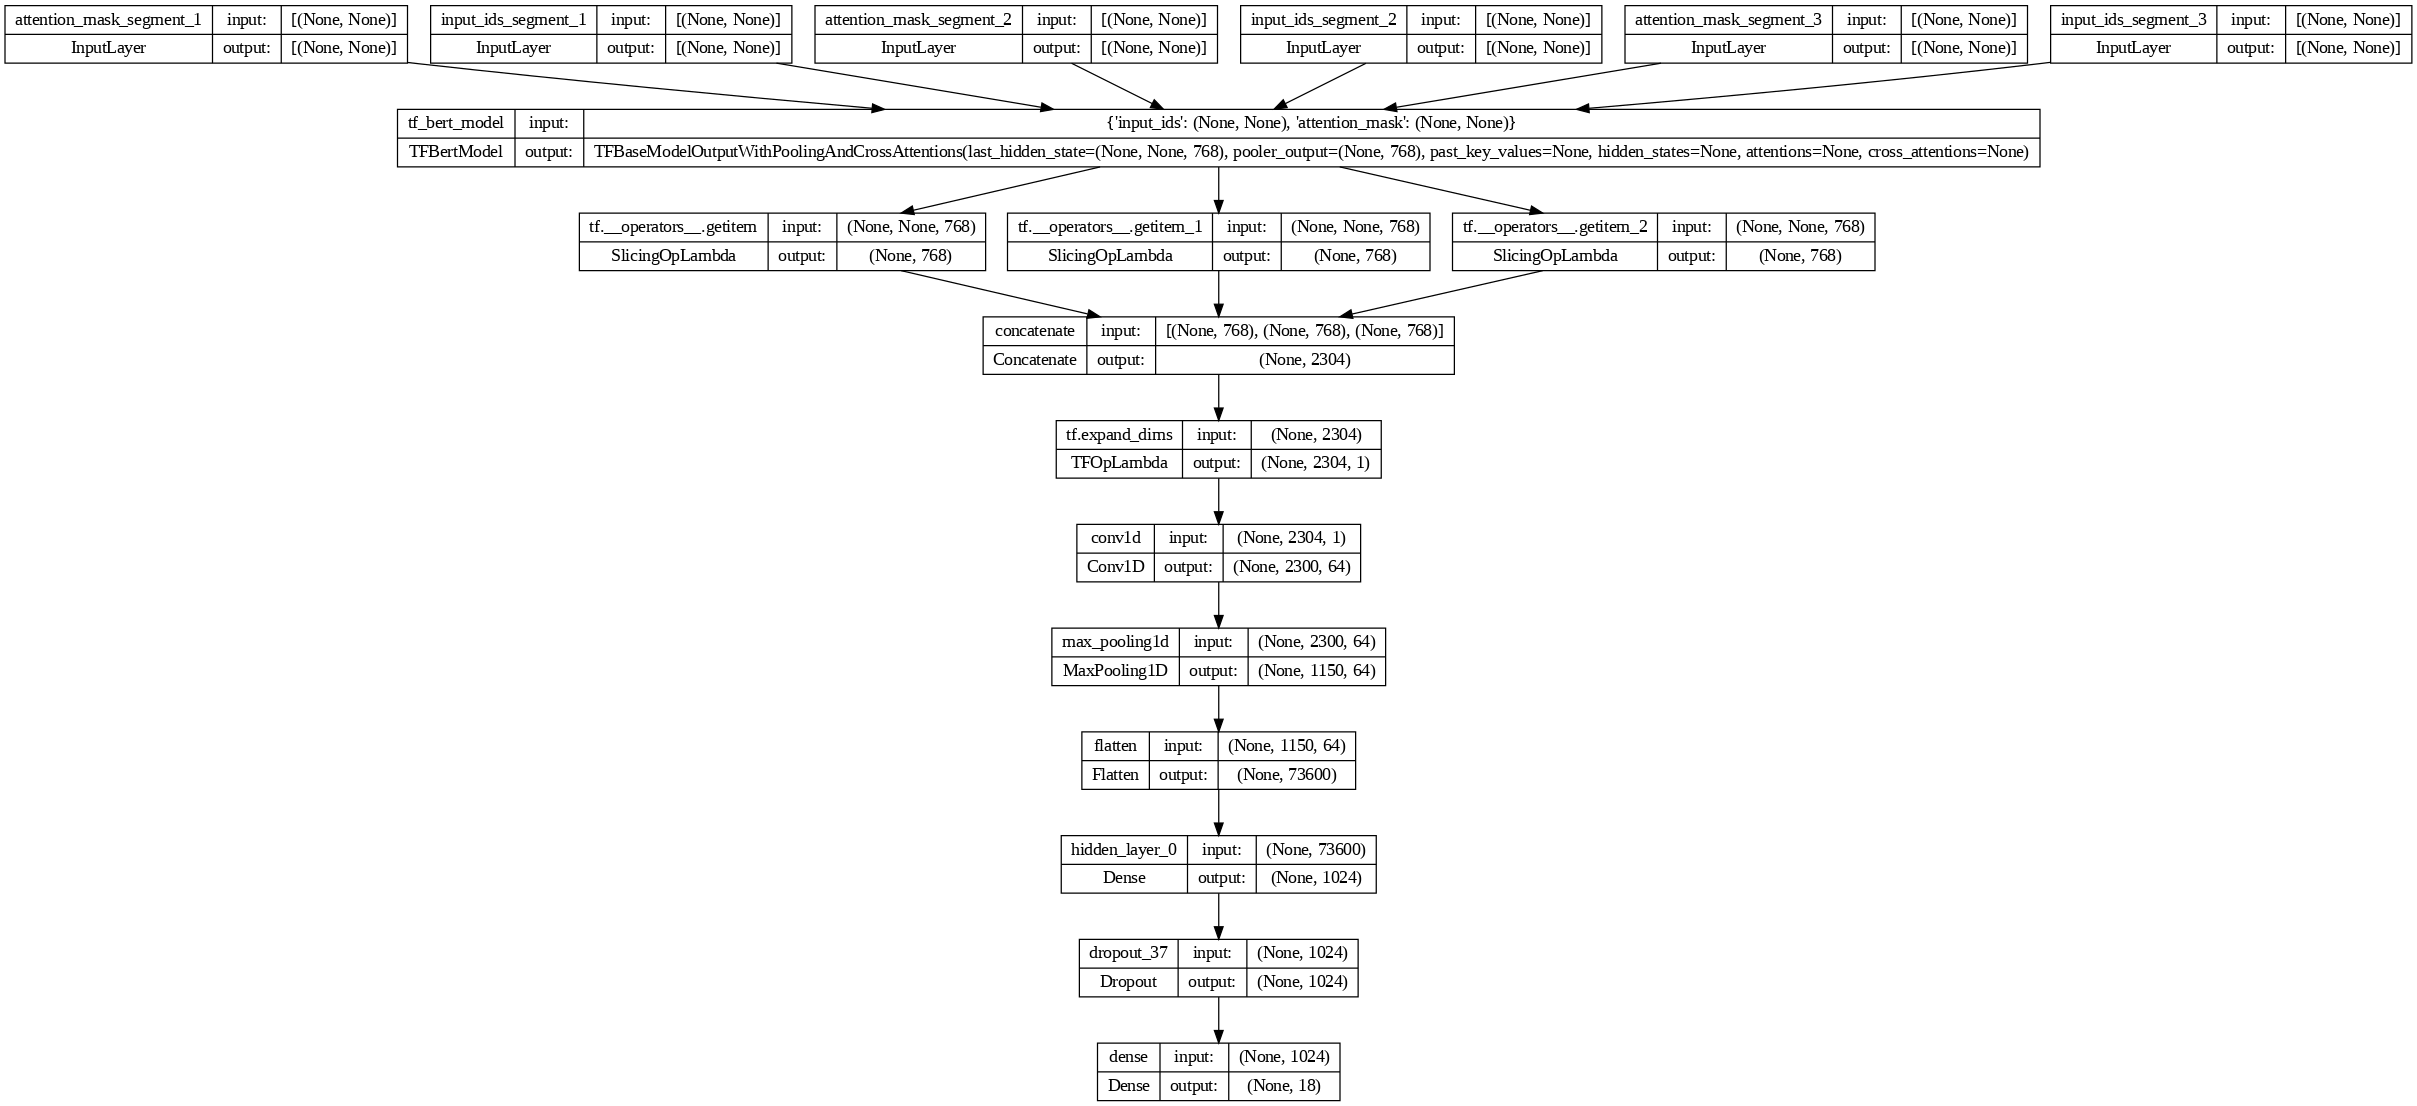

In [ ]:
keras.utils.plot_model(scibert_model, show_shapes=True, show_dtype=False, show_layer_names=True, dpi=90)

In [ ]:
#It takes 10 to 14 minutes to complete an epoch when using a GPU
# model_history = scibert_model.fit(
#     [train_encodings.input_ids, train_encodings.attention_mask],
#     train_labels,
#     validation_data=(
#         [valid_encodings.input_ids, valid_encodings.attention_mask],
#         val_labels
#     ),
#     batch_size=8,
#     epochs=2,
#     sample_weight=sample_weights
# )

In [ ]:
def restructure_encodings_for_training(tokenized_outputs):
    input_ids_segment_1, attention_masks_segment_1 = [], []
    input_ids_segment_2, attention_masks_segment_2 = [], []
    input_ids_segment_3, attention_masks_segment_3 = [], []

    for doc_encodings in tokenized_outputs:
        segment_1 = doc_encodings[0]
        input_ids_segment_1.append(segment_1['input_ids'].numpy())
        attention_masks_segment_1.append(segment_1['attention_mask'].numpy())

        if len(doc_encodings) > 1:
            segment_2 = doc_encodings[1]
            input_ids_segment_2.append(segment_2['input_ids'].numpy())
            attention_masks_segment_2.append(segment_2['attention_mask'].numpy())
        else:
            input_ids_segment_2.append(segment_1['input_ids'].numpy())
            attention_masks_segment_2.append(segment_1['attention_mask'].numpy())

        if len(doc_encodings) > 2:
            segment_3 = doc_encodings[2]
            input_ids_segment_3.append(segment_3['input_ids'].numpy())
            attention_masks_segment_3.append(segment_3['attention_mask'].numpy())
        else:
            input_ids_segment_3.append(segment_1['input_ids'].numpy())
            attention_masks_segment_3.append(segment_1['attention_mask'].numpy())

    input_ids_segment_1 = np.vstack(input_ids_segment_1)
    attention_masks_segment_1 = np.vstack(attention_masks_segment_1)
    input_ids_segment_2 = np.vstack(input_ids_segment_2)
    attention_masks_segment_2 = np.vstack(attention_masks_segment_2)
    input_ids_segment_3 = np.vstack(input_ids_segment_3)
    attention_masks_segment_3 = np.vstack(attention_masks_segment_3)

    return [input_ids_segment_1, attention_masks_segment_1, input_ids_segment_2, attention_masks_segment_2, input_ids_segment_3, attention_masks_segment_3]

train_inputs = restructure_encodings_for_training(train_encodings)
valid_inputs = restructure_encodings_for_training(valid_encodings)
test_inputs = restructure_encodings_for_training(test_encodings)

model_history = scibert_model.fit(
    train_inputs,
    train_labels,
    validation_data=(valid_inputs, val_labels),
    batch_size=8,
    epochs=2,
    sample_weight=sample_weights
)


Epoch 1/2


4009/4009 [==============================] - 2730s 667ms/step - loss: 0.0143 - accuracy: 0.4978 - val_loss: 0.1499 - val_accuracy: 0.5695
Epoch 2/2
4009/4009 [==============================] - 2656s 662ms/step - loss: 0.0109 - accuracy: 0.5583 - val_loss: 0.1316 - val_accuracy: 0.5707


Validation Data Set Evaluation

In [ ]:
val_score = scibert_model.evaluate(
    valid_inputs,
    val_labels,
    batch_size=8
)
print('Val loss:', val_score[0])
print('Val accuracy:', val_score[1])


502/502 [==============================] - 110s 219ms/step - loss: 0.1316 - accuracy: 0.5707
Val loss: 0.13157568871974945
Val accuracy: 0.5707159042358398


In [ ]:
val_predictions = scibert_model.predict(
    valid_inputs,
    batch_size=8
)


502/502 [==============================] - 118s 217ms/step


              precision    recall  f1-score   support

        AGRI       0.67      0.81      0.74       432
        BIOC       0.69      0.78      0.73       663
        CENG       0.53      0.53      0.53       198
        CHEM       0.66      0.53      0.59       263
        COMP       0.51      0.70      0.59       157
        EART       0.70      0.83      0.76       223
        ENER       0.69      0.74      0.71       236
        ENGI       0.68      0.56      0.61       433
        ENVI       0.67      0.70      0.68       570
        IMMU       0.61      0.78      0.68       236
        MATE       0.69      0.75      0.72       340
        MEDI       0.81      0.75      0.78       797
        MULT       0.98      0.57      0.72       438
        NEUR       0.78      0.90      0.84       332
        PHAR       0.70      0.55      0.62       227
        PHYS       0.49      0.72      0.58       242
        PSYC       0.64      0.70      0.67       133
        SOCI       0.84    

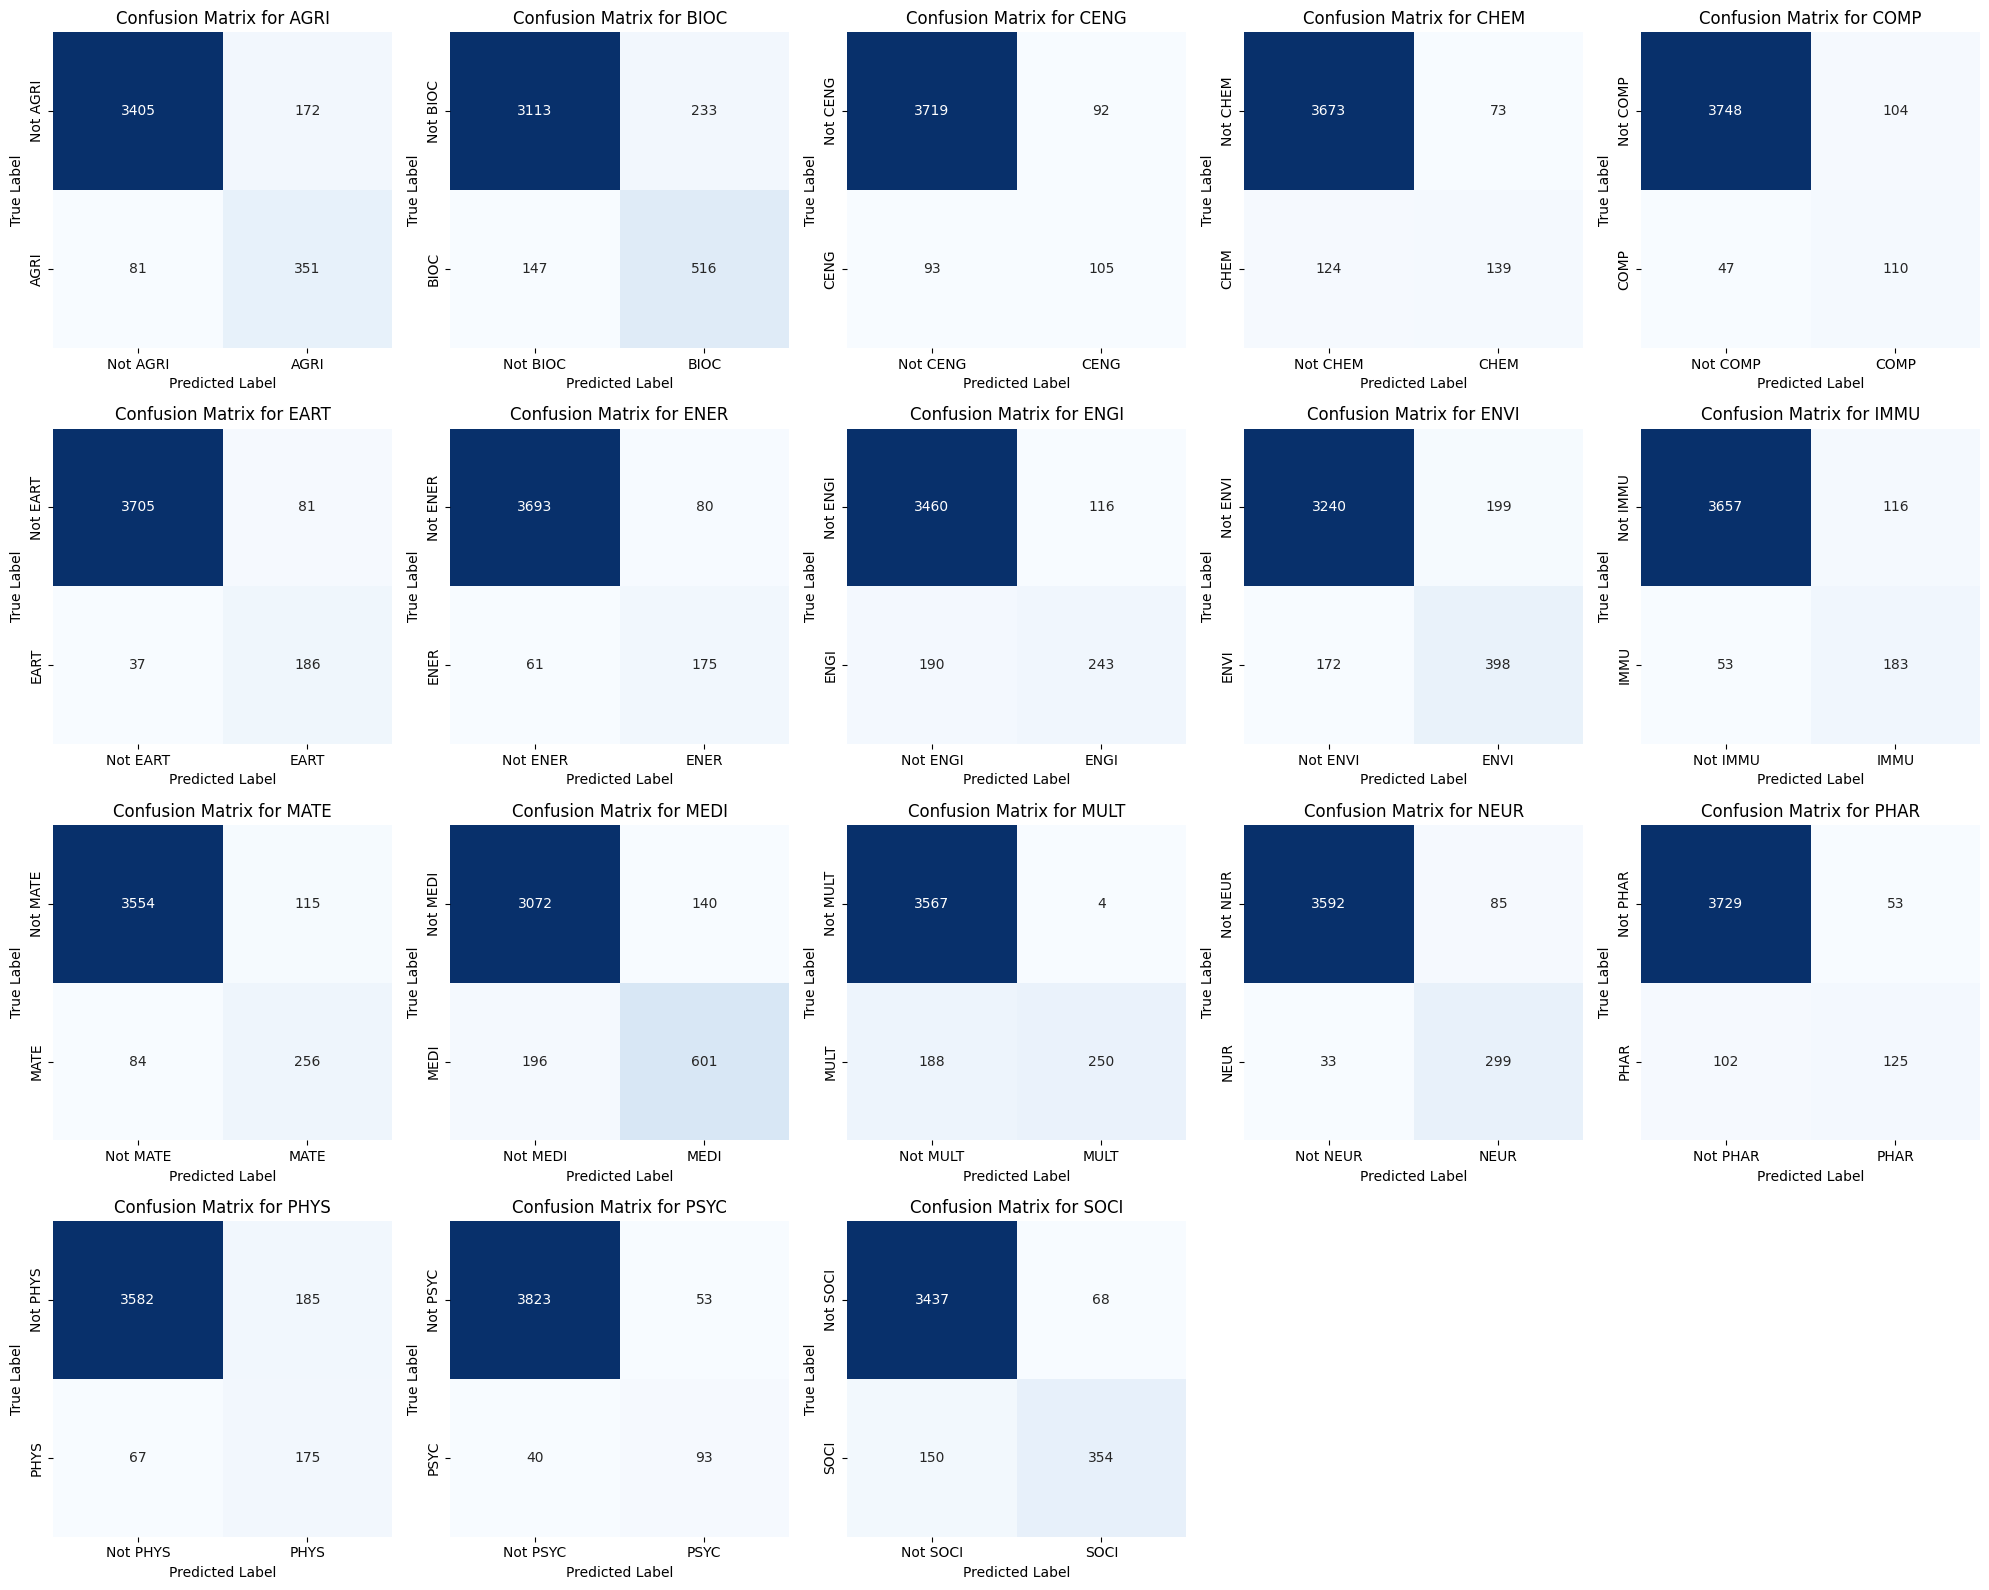

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

def show_results(model, features, true_labels, classes, threshold=0.5):
    yhat_val = (val_predictions >= threshold).astype(int)

    print(classification_report(true_labels, yhat_val, target_names=classes, zero_division=1))

    confusion_matrices = multilabel_confusion_matrix(true_labels, yhat_val)

    n_classes = len(classes)
    n_cols = 5
    n_rows = int(np.ceil(n_classes / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

    axes = axes.flatten()

    for i, matrix in enumerate(confusion_matrices):
        sns.heatmap(matrix,
                    annot=True,
                    fmt='d',
                    cmap='Blues',
                    cbar=False,
                    ax=axes[i])
        axes[i].set_title(f'Confusion Matrix for {classes[i]}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
        axes[i].set_xticklabels(['Not '+classes[i], classes[i]])
        axes[i].set_yticklabels(['Not '+classes[i], classes[i]], va='center')

    for ax in axes[n_classes:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

show_results(scibert_model,
             valid_inputs,
             val_labels,
             target_names)


In [ ]:
test_inputs = restructure_encodings_for_training(test_encodings)

In [ ]:
test_score = scibert_model.evaluate(
    test_inputs,
    test_labels,
    batch_size=8
)
print('Val loss:', test_score[0])
print('Val accuracy:', test_score[1])


501/501 [==============================] - 110s 219ms/step - loss: 0.1354 - accuracy: 0.5661
Val loss: 0.13538001477718353
Val accuracy: 0.5661177635192871


In [ ]:
test_predictions = scibert_model.predict(
    test_inputs,
    batch_size=8
)


501/501 [==============================] - 109s 217ms/step


              precision    recall  f1-score   support

        AGRI       0.71      0.79      0.75       426
        BIOC       0.67      0.75      0.71       669
        CENG       0.47      0.51      0.49       176
        CHEM       0.65      0.49      0.56       221
        COMP       0.47      0.67      0.55       171
        EART       0.77      0.86      0.81       221
        ENER       0.66      0.72      0.68       279
        ENGI       0.62      0.57      0.60       426
        ENVI       0.62      0.70      0.66       515
        IMMU       0.61      0.78      0.69       249
        MATE       0.64      0.80      0.71       323
        MEDI       0.79      0.75      0.77       859
        MULT       0.97      0.57      0.72       422
        NEUR       0.78      0.90      0.83       365
        PHAR       0.68      0.55      0.61       230
        PHYS       0.46      0.79      0.58       226
        PSYC       0.47      0.58      0.52       106
        SOCI       0.85    

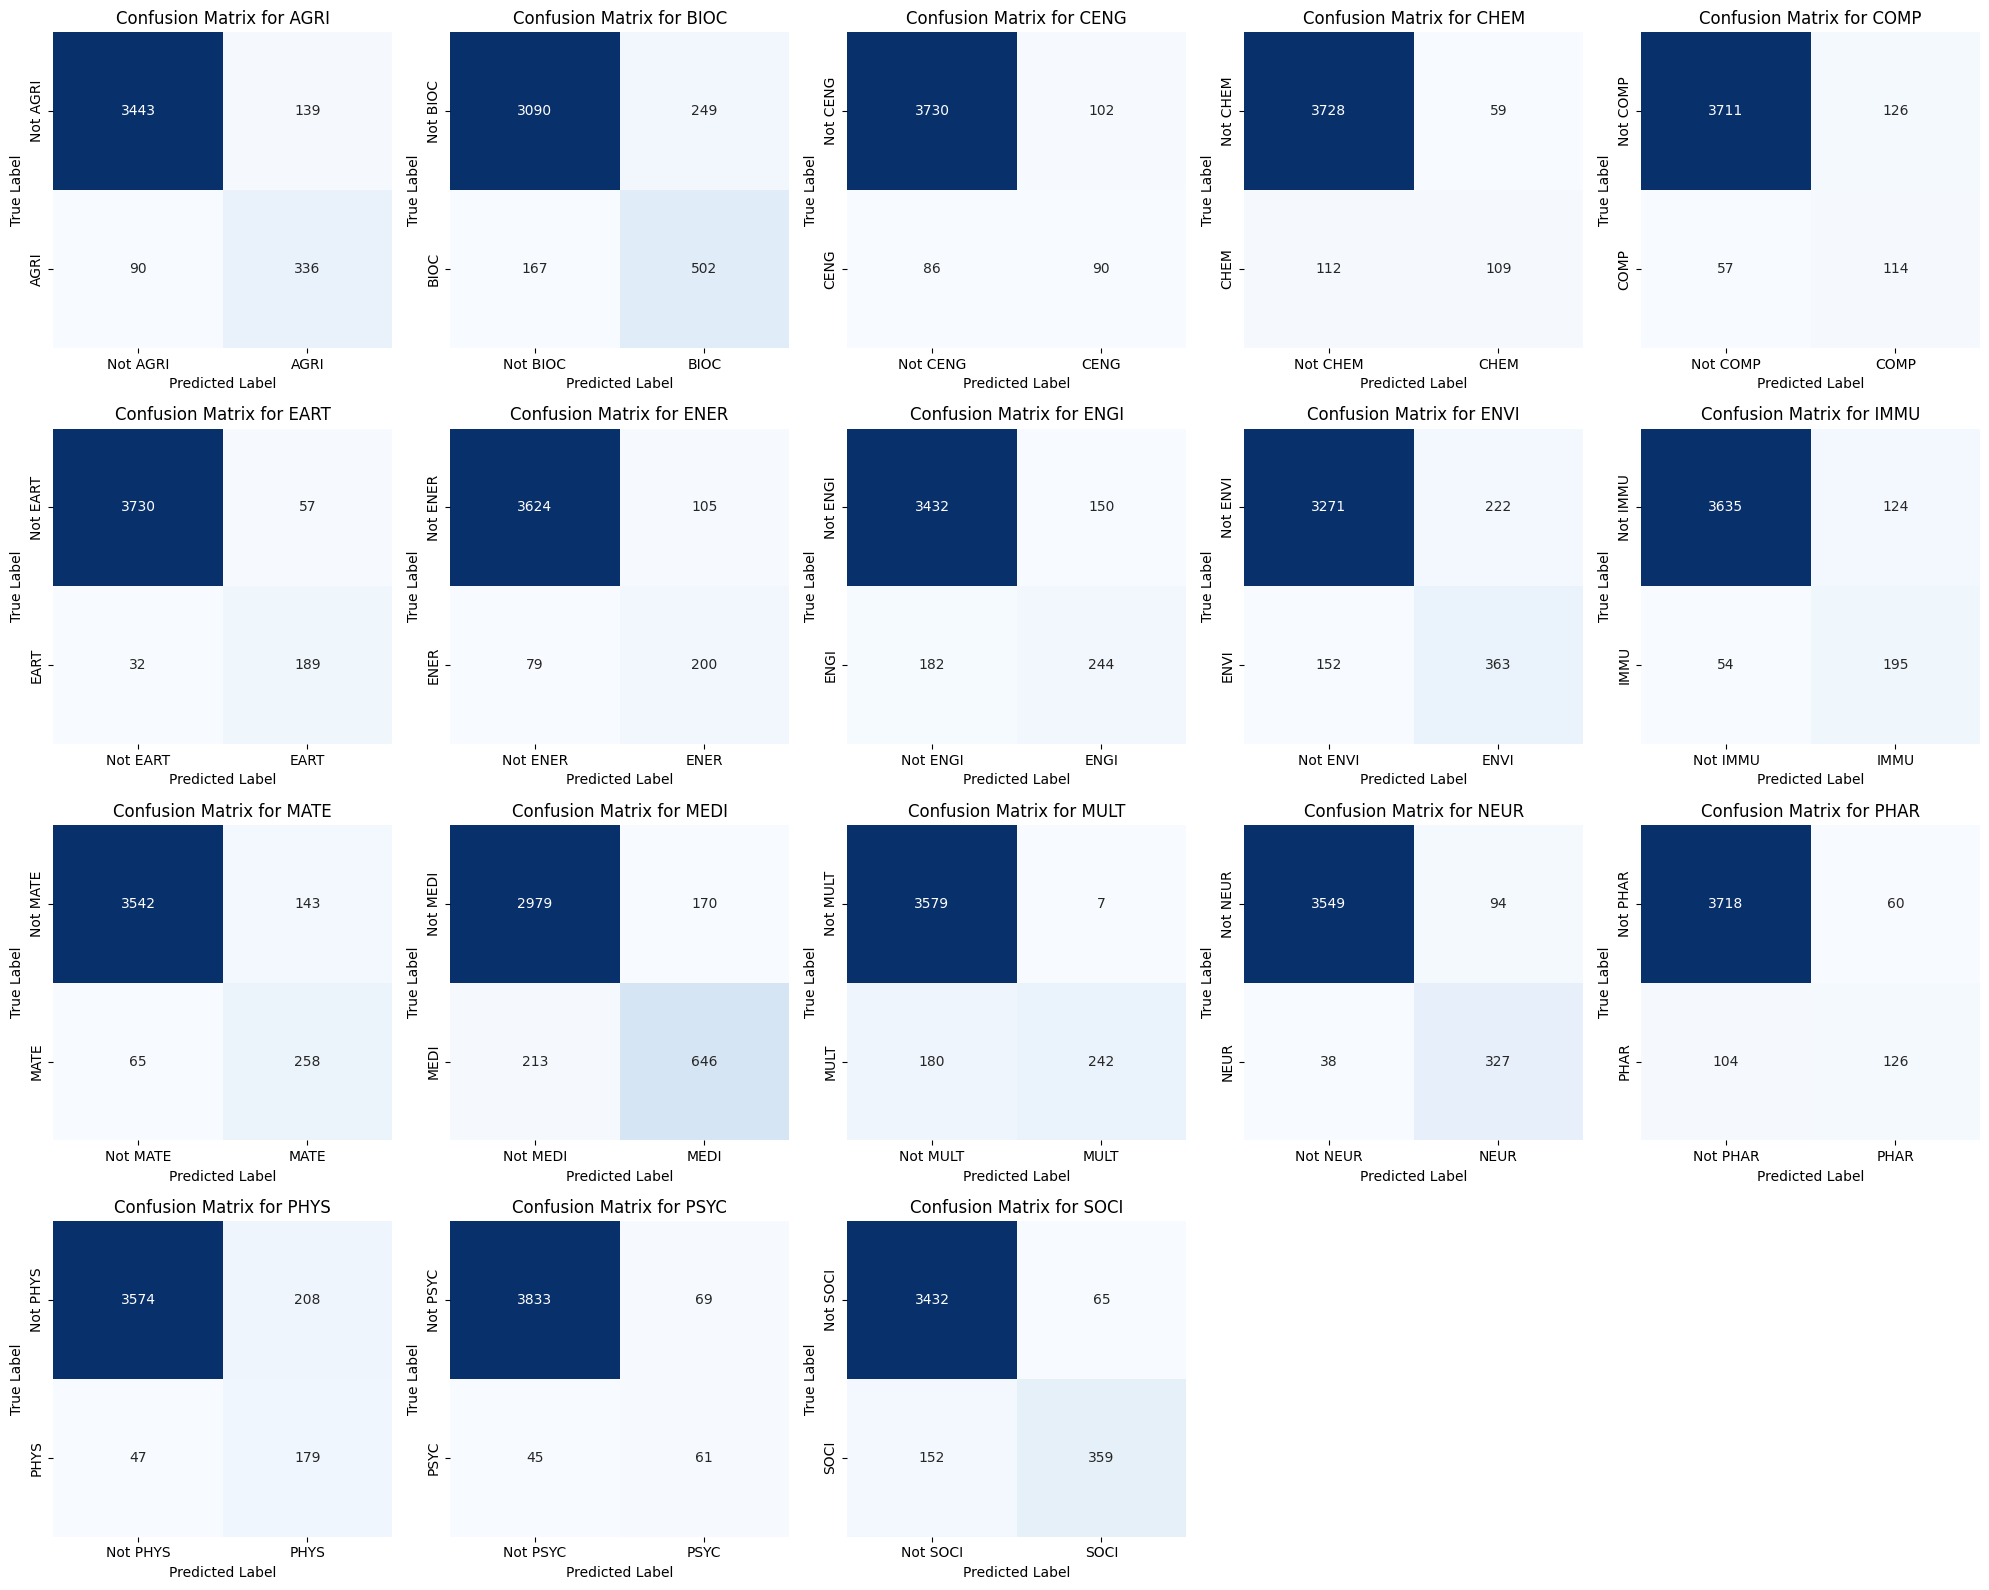

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

def show_results(model, features, true_labels, classes, threshold=0.5):
    yhat_test = (test_predictions >= threshold).astype(int)

    print(classification_report(true_labels, yhat_test, target_names=classes, zero_division=1))

    confusion_matrices = multilabel_confusion_matrix(true_labels, yhat_test)

    n_classes = len(classes)
    n_cols = 5
    n_rows = int(np.ceil(n_classes / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

    axes = axes.flatten()

    for i, matrix in enumerate(confusion_matrices):
        sns.heatmap(matrix,
                    annot=True,
                    fmt='d',
                    cmap='Blues',
                    cbar=False,
                    ax=axes[i])
        axes[i].set_title(f'Confusion Matrix for {classes[i]}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
        axes[i].set_xticklabels(['Not '+classes[i], classes[i]])
        axes[i].set_yticklabels(['Not '+classes[i], classes[i]], va='center')

    for ax in axes[n_classes:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

show_results(scibert_model,
             test_inputs,
             test_labels,
             target_names)


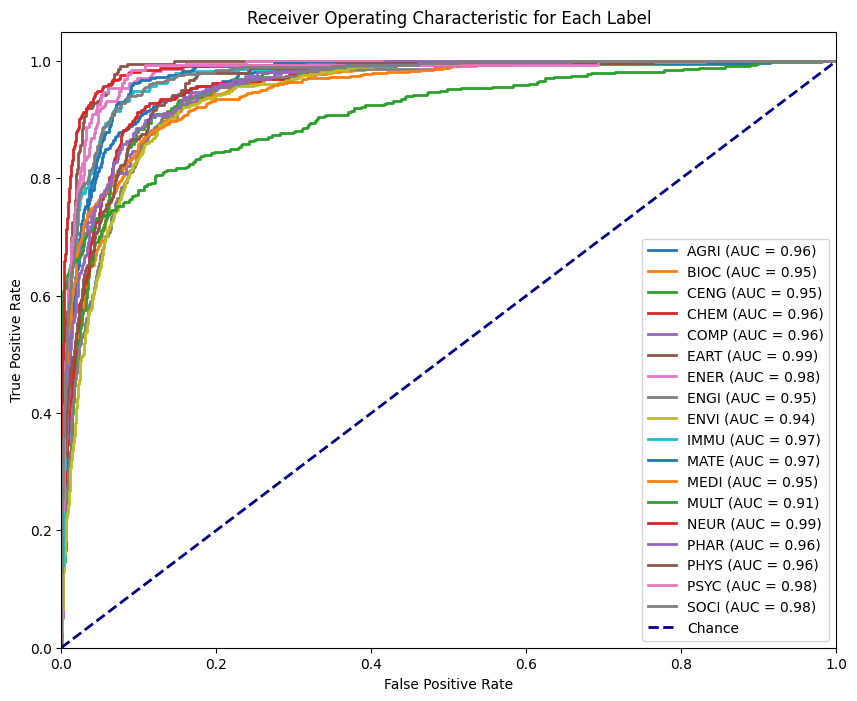

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_multilabel_roc(true_labels, predictions, target_names):
    """
    Function to plot the ROC curves for each label in multi-label classification.

    Parameters:
    - true_labels: Array-like of shape (n_samples, n_labels), ground truth label indicators.
    - predictions: Array-like of shape (n_samples, n_labels), prediction probabilities or decision function.
    - target_names: List of strings of shape (n_labels,), names of each of the labels.

    """
    n_labels = true_labels.shape[1]

    fig, ax = plt.subplots(figsize=(10, 8))

    for i in range(n_labels):
        fpr, tpr, _ = roc_curve(true_labels[:, i], predictions[:, i])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{target_names[i]} (AUC = {roc_auc:.2f})')

    # Plot chance line
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

    # Customize the plot
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic for Each Label')
    ax.legend(loc="lower right")

    # Show the plot
    plt.show()

plot_multilabel_roc(val_labels, val_predictions, target_names)


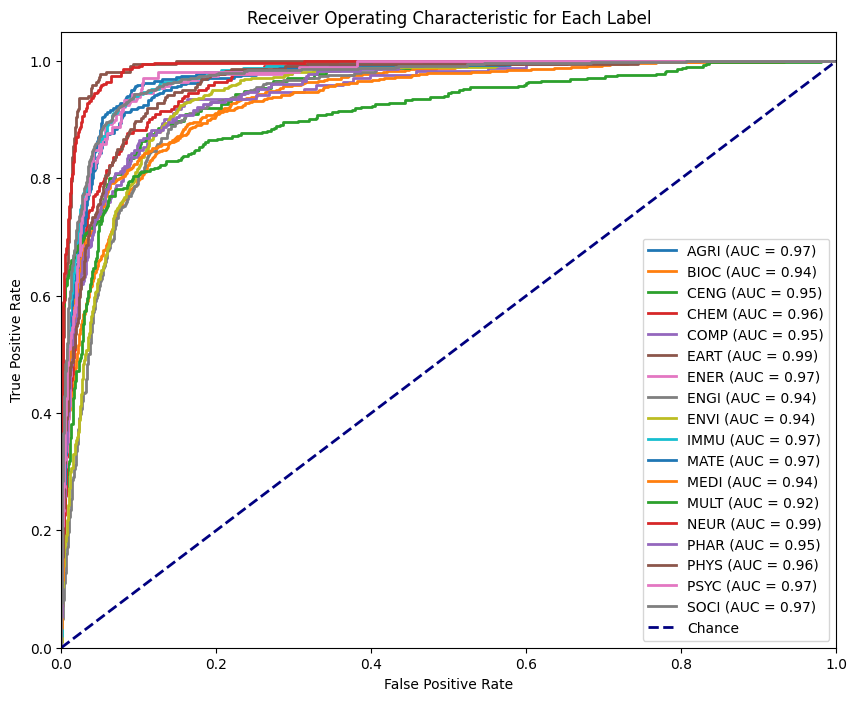

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_multilabel_roc(true_labels, predictions, target_names):
    """
    Function to plot the ROC curves for each label in multi-label classification.

    Parameters:
    - true_labels: Array-like of shape (n_samples, n_labels), ground truth label indicators.
    - predictions: Array-like of shape (n_samples, n_labels), prediction probabilities or decision function.
    - target_names: List of strings of shape (n_labels,), names of each of the labels.

    """
    n_labels = true_labels.shape[1]

    fig, ax = plt.subplots(figsize=(10, 8))

    for i in range(n_labels):
        fpr, tpr, _ = roc_curve(true_labels[:, i], predictions[:, i])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{target_names[i]} (AUC = {roc_auc:.2f})')

    # Plot chance line
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

    # Customize the plot
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic for Each Label')
    ax.legend(loc="lower right")

    # Show the plot
    plt.show()

plot_multilabel_roc(test_labels, test_predictions, target_names)


In [ ]:
!pip install google-auth

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

def save_predictions_to_csv(test_predictions, test_texts, test_df, target_names, result_path, threshold=0.5):
    """
    Process model predictions and save a CSV file with abstracts, true labels, predicted labels,
    the most probable predicted label, and its probability.

    Args:
        test_predictions (np.array): The predictions from the model, assumed to be probabilities.
        test_texts (list or np.array): The texts that were input to the model for prediction.
        test_df (pd.DataFrame): The original DataFrame containing the true labels.
        target_names (list): List of target class names corresponding to indices in model outputs.
        result_path (str, optional): Path to save the resulting CSV file. Defaults to './'.
        threshold (float, optional): Probability threshold to consider a prediction as positive. Defaults to 0.5.
    """
    predicted_labels = []
    max_probs = []
    max_labels = []

    for probs in test_predictions:
        labels = [target_names[idx] for idx, p in enumerate(probs) if p >= threshold]
        predicted_labels.append(labels)

        # Identify the max probability and corresponding label
        max_idx = np.argmax(probs)
        max_prob = probs[max_idx]
        max_label = target_names[max_idx]

        max_probs.append(max_prob)
        if labels:
            max_labels.append(max_label)
        else:
            max_probs[-1] = 0  # Reset max_prob if no labels meet the threshold
            max_labels.append("No Label")

    # Preparing the DataFrame
    result_df = pd.DataFrame({
        'abstract': test_texts,
        'true_label': test_df['subjareas'],
        'pred_label': predicted_labels,
        'max_pred_label': max_labels,
        'max_prediction_probability': max_probs
    })

    result_df['pred_label'] = result_df['pred_label'].apply(lambda x: ', '.join(x) if x else 'No Label')

    # Saving the results
    result_df.to_csv(result_path + 'scibert_cnn_part3.csv', index=False)

    return result_df

result_path = '/content/drive/MyDrive/'
save_predictions_to_csv(test_predictions, concatenated_test_texts, test_df, target_names, result_path)


Mounted at /content/drive


,abstract,true_label,pred_label,max_pred_label,max_prediction_probability
0,[Highly active antiretroviral therapy (HAART) ...,"[BIOC, PHAR]","BIOC, PHAR",BIOC,0.978748
1,[This research takes a holistic approach to co...,"[AGRI, EART, ENVI]","AGRI, ENVI",ENVI,0.944912
2,[Aspergillus flavus has long been considered t...,"[AGRI, ENVI]",IMMU,IMMU,0.927968
3,[Reactivation of hippocampal place cell sequen...,[NEUR],NEUR,NEUR,0.910016
4,[A tidal turbine simulation system is develope...,[ENER],"ENER, ENGI, ENVI",ENER,0.841970
...,...,...,...,...,...
4003,[Rett syndrome (RTT) is a progressive neurodev...,"[BIOC, CHEM]","BIOC, IMMU",BIOC,0.614451
4004,[We provide the raw data for protein and pepti...,[MULT],MULT,MULT,0.979170
4005,[The second Infectious Intestinal Diseases stu...,[MEDI],MEDI,MEDI,0.967733
4006,[The assessment of nociceptive thresholds is e...,"[NEUR, PSYC]",NEUR,NEUR,0.957034
